# Lectura y graficación de una señal almacenada en un archivo txt

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, lfilter, freqz, iirnotch, filtfilt

## Leemos el archivo

In [6]:

def map_v(value, in_min, in_max, out_min, out_max):
    return (value - in_min) * (out_max - out_min) / (in_max - in_min) + out_min

Ts = 1/1000
Fs = 1/Ts
'''
Luz
Procedimiento
'''
adr = 'Imagenes/'
file = 'Luz'
array = np.genfromtxt(file + ".txt", delimiter="	0	0	0	0	")
array = array[:,1]
aux = array
array = map_v(array, 0, 1023, -1.5, 1.5)
t = np.arange(len(array))*Ts
print('Seconds: ',len(t)*Ts)

Seconds:  58.800000000000004


## Ploteamos la lectura

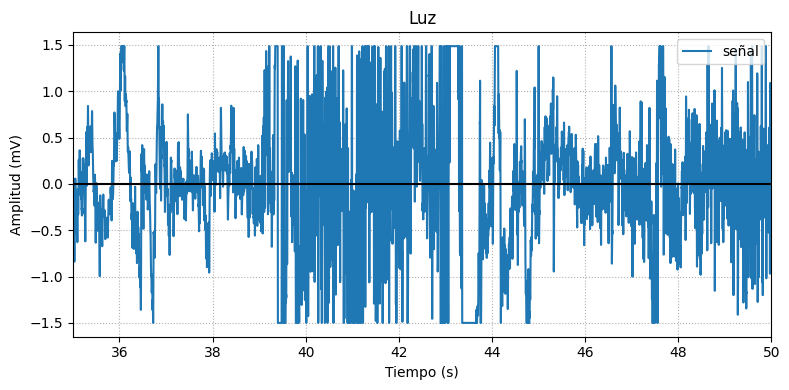

In [7]:
fsize = 8

fig = plt.figure(figsize = (fsize,4))
plt.plot(t, array, label="señal")      # graficamos la señal
plt.xlim(35,50)
plt.grid(linestyle=":")
plt.title(file)
plt.axhline(0.0, color='k')
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud (mV)")
plt.legend(loc="upper right")
plt.tight_layout()
plt.show()

## La forma de saber la frecuencia de la señal es viendo en el dominio de la frecuencia

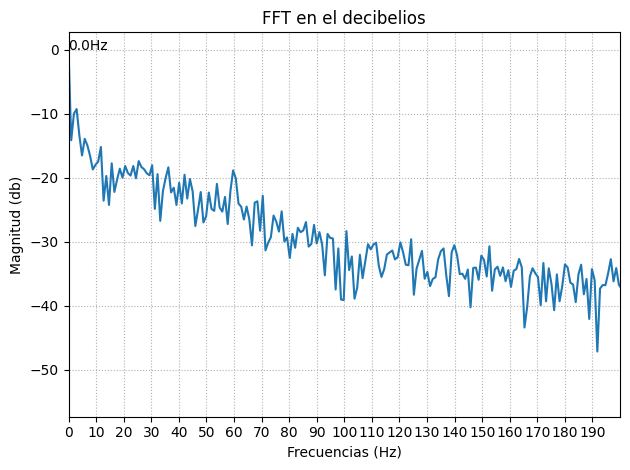

In [8]:
N = 2**10                                     # 10 bits, 0-1023

signal1 = aux

signal_fft = np.fft.fft(signal1, N)           # fft magtinud
signal_fft = np.round(np.abs(signal_fft),3)[0:N//2] # nos quedamos con los componente de la derecha de la FFT
signal_aux = signal_fft/signal_fft.max()     # hallamos el maximo para pasar la magnitud a escala db

with np.errstate(divide='ignore'):
    signal_fft_db = 10*np.log10(signal_aux)  # , out=signal_aux, where=signal_aux >= 0 para evitar division por zero

F_list = np.linspace(0,Fs/2, N//2)
F = np.round(F_list[np.argmax(signal_fft_db)], 1)   # argmax, encuentra el argumento max en un array

Ffig = plt.figure()
plt.plot(F_list, signal_fft_db)  #10 * np.log10(P / Pref) , decibelios
plt.text(F,0, f"{F}Hz")
plt.grid(linestyle=":")
plt.ylabel("Magnitud (db)")
plt.xlabel("Frecuencias (Hz)")
plt.title("FFT en el decibelios")
plt.xlim([0,200])
plt.xticks(np.arange(0,200,10))
plt.tight_layout()
plt.show()


In [9]:
Ffig.savefig(adr + file + ' Freq_response.png')
# fig.savefig(adr + file + ' Raw_Signal.png')
# f.savefig(adr + file + ' Filtered_Signal.png')